# Documentação

`!pip install yfinance`

### Artigo original:
https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907

### Modelo ARIMA:
https://pt.wikipedia.org/wiki/ARIMA

### Uso do Auto-ARIMA:
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd



## Requisitos
~~~python
!pip install yfinance
~~~

In [13]:
ticker = input('Insira o código do papel:')

Insira o código do papel:EURUSD=X


In [20]:
n_steps = int(input('Quantas predições deseja?'))

Quantas predições deseja?20


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from functions import get_finance_data, get_forecast, get_auto_arima

plt.style.use('fivethirtyeight')

In [22]:
#ticker = "RBBV11.SA"
data = get_finance_data(ticker)
train = data['Low'][:len(data)-n_steps]
test = data['Low'][-n_steps:]

In [15]:
arima_model = get_auto_arima(ticker)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-1922.486, Time=0.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1793.514, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1879.322, Time=0.55 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-1931.648, Time=0.80 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-1802.126, Time=0.24 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.82 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-1927.039, Time=2.65 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-1879.032, Time=0.56 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-1888.288, Time=1.22 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-1930.164, Time=1.09 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-1929.946, Time=0.92 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-1932.330, Time=0.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-1803.982, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-1917.954, Time=0.82 sec
 ARIMA(1,1,

In [16]:
def desvio(registro):
    return ((registro['predição']/registro['valor'])-1)*100

In [23]:
df = pd.DataFrame({'predição':arima_model.predict(n_periods=n_steps),'valor':test}, index=test.index)
df['desvio (%)'] = df.apply(desvio, axis=1)
prd = df
df


,predição,valor,desvio (%)
Date,,,
2020-11-30,1.217354,1.194415,1.920558
2020-12-01,1.218509,1.193599,2.086967
2020-12-02,1.218052,1.204079,1.160439
2020-12-03,1.217184,1.210243,0.573461
2020-12-04,1.217893,1.213371,0.372632
2020-12-07,1.218879,1.208080,0.893898
2020-12-08,1.220032,1.209716,0.852731
2020-12-09,1.220359,1.207394,1.073799
2020-12-10,1.221443,1.208036,1.109811


<function matplotlib.pyplot.show(*args, **kw)>

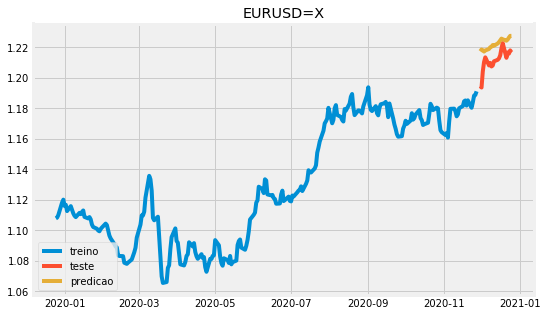

In [24]:
plt.figure(figsize=(8,5))
plt.plot(train, label="treino")
plt.plot(test, label="teste")
plt.plot(prd['predição'], label="predicao")
plt.legend(loc='lower left')
plt.title(label=ticker)
plt.show

In [25]:
arima_model.predict?